In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
from sklearn.metrics import r2_score
import time
import warnings

from datetime import datetime

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
dis = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\DIS.csv", index_col = "Date", parse_dates = True)
dis = dis[dis.index >= np.datetime64(datetime(1998, 1, 1))]

f = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\F.csv", index_col = "Date", parse_dates = True)
f = f[f.index >= np.datetime64(datetime(1998, 1, 1))]

ubs = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\\UBS.csv", index_col = "Date", parse_dates = True)
ubs = ubs[ubs.index >= np.datetime64(datetime(1998, 1, 1))]

xom = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\XOM.csv", index_col = "Date", parse_dates = True)
xom = xom[xom.index >= np.datetime64(datetime(1998, 1, 1))]

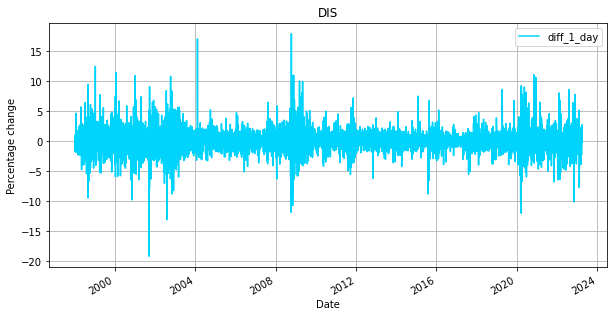

In [3]:
dis["diff_1_day"] = dis['Open'].pct_change(periods = 1).fillna(0).apply(lambda x: x*100)
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("DIS")
plt.ylabel("Percentage change")
dis.plot(use_index=True, y = 'diff_1_day', grid = True, color = '#00d4fd', ax = ax)
plt.legend()

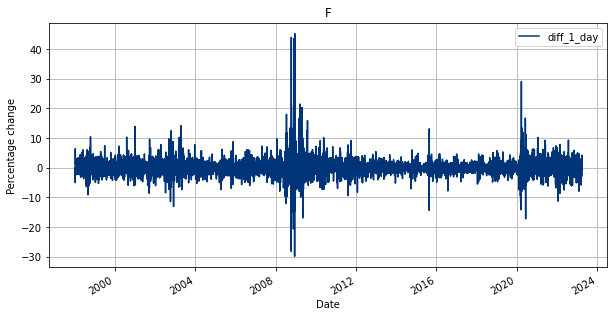

In [4]:
f["diff_1_day"] = f['Open'].pct_change(periods = 1).fillna(0).apply(lambda x: x*100)
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("F")
plt.ylabel("Percentage change")
f.plot(use_index=True, y = 'diff_1_day', grid = True, color = '#003478', ax = ax)
plt.legend()

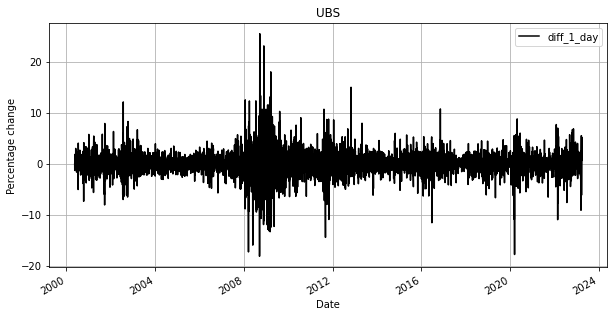

In [5]:
ubs["diff_1_day"] = ubs['Open'].pct_change(periods = 1).fillna(0).apply(lambda x: x*100)
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("UBS")
plt.ylabel("Percentage change")
ubs.plot(use_index=True, y = 'diff_1_day', grid = True, color = '#000000', ax = ax)
plt.legend()

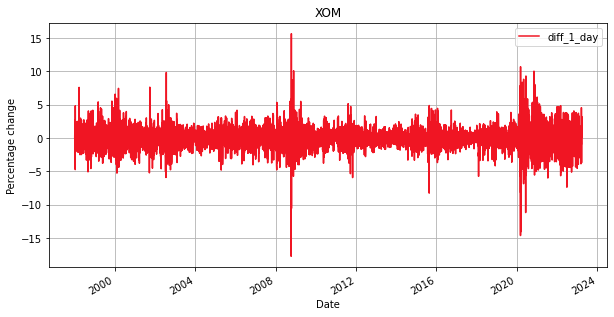

In [6]:
xom["diff_1_day"] = xom['Open'].pct_change(periods = 1).fillna(0).apply(lambda x: x*100)
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("XOM")
plt.ylabel("Percentage change")
xom.plot(use_index=True, y = 'diff_1_day', grid = True, color = '#F01523', ax = ax)
plt.legend()

0.03607943920136029 1.929297081562439
[2.329608059184637, 8.311034157091138, 40.09129545096805, 39.05241618133165, 7.665669762317016, 2.5499763891075085]


<BarContainer object of 6 artists>

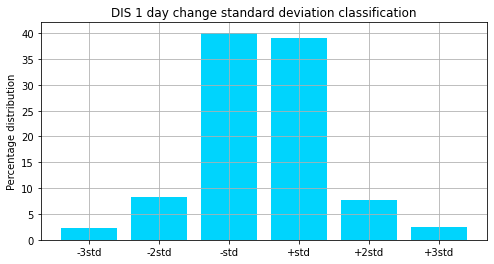

In [30]:
dis_changes = dis['Open'].pct_change(periods = 1).fillna(value = 0).apply(lambda x: x*100).values

center = np.mean(dis_changes)
sig = np.std(dis_changes)
n = len(dis_changes)

print(center, sig)

classes = [[-100, center-2*sig], [center-2*sig, center-1*sig], [center-1*sig, center], [center, center+1*sig], [center+1*sig, center+2*sig], [center+2*sig, 100]]
his = [0]*6

for val in dis_changes:
    for i in range(3):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

    for i in range(3, 6):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

eloszlas = []
for cl in his:
    eloszlas.append(cl*100/n)

print(eloszlas)
    
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("DIS 1 day change standard deviation classification")
plt.ylabel("Percentage distribution")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],eloszlas, color = '#00d4fd')

0.03419458947313889 2.8565756446291712
[1.6685030694160239, 7.14623012749882, 43.27089563985518, 38.89501023138675, 7.004564772548402, 2.0147961592948214]


<BarContainer object of 6 artists>

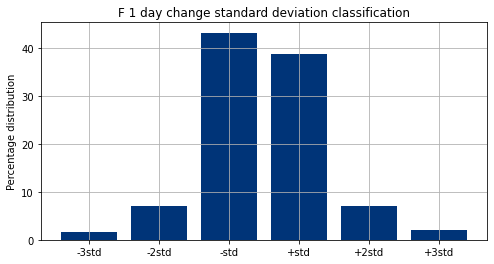

In [34]:
f_changes = f['Open'].pct_change(periods = 1).fillna(value = 0).apply(lambda x: x*100).values

center = np.mean(f_changes)
sig = np.std(f_changes)
n = len(f_changes)

print(center, sig)

classes = [[-100, center-2*sig], 
           [center-2*sig, center-1*sig], 
           [center-1*sig, center], 
           [center, center+1*sig], 
           [center+1*sig, center+2*sig], 
           [center+2*sig, 100]]

his = [0]*6

for val in f_changes:
    for i in range(3):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

    for i in range(3, 6):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

eloszlas = []
for cl in his:
    eloszlas.append(cl*100/n)

print(eloszlas)
    
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("F 1 day change standard deviation classification")
plt.ylabel("Percentage distribution")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],eloszlas, color = '#003478')

0.02623397043204542 2.337921526966261
[2.5364836692147326, 7.31410701876303, 39.5587213342599, 41.400277970813065, 6.810284920083391, 2.380125086865879]


<BarContainer object of 6 artists>

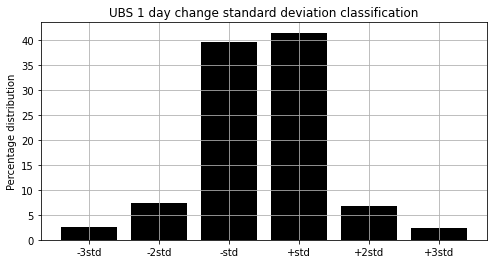

In [32]:
ubs_changes = ubs['Open'].pct_change(periods = 1).fillna(value = 0).apply(lambda x: x*100).values

center = np.mean(ubs_changes)
sig = np.std(ubs_changes)
n = len(ubs_changes)

print(center, sig)

classes = [[-100, center-2*sig], [center-2*sig, center-1*sig], [center-1*sig, center], [center, center+1*sig], [center+1*sig, center+2*sig], [center+2*sig, 100]]
his = [0]*6

for val in ubs_changes:
    for i in range(3):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

    for i in range(3, 6):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

eloszlas = []
for cl in his:
    eloszlas.append(cl*100/n)

print(eloszlas)
    
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("UBS 1 day change standard deviation classification")
plt.ylabel("Percentage distribution")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ], eloszlas, color = '#000000')

0.03369941126194879 1.6452441239592226
[2.6129387690854715, 9.34991342672753, 37.35243192192665, 39.47741224618291, 8.846214386903824, 2.361089249173619]


<BarContainer object of 6 artists>

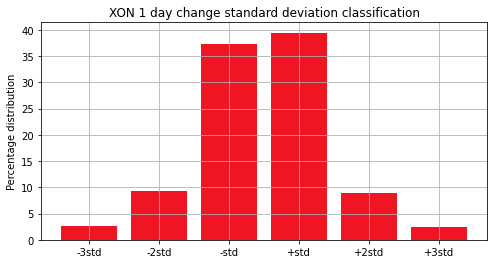

In [33]:
xom_changes = xom['Open'].pct_change(periods = 1).fillna(value = 0).apply(lambda x: x*100).values

center = np.mean(xom_changes)
sig = np.std(xom_changes)
n = len(xom_changes)

print(center, sig)

classes = [[-100, center-2*sig], [center-2*sig, center-1*sig], [center-1*sig, center], [center, center+1*sig], [center+1*sig, center+2*sig], [center+2*sig, 100]]
his = [0]*6

for val in xom_changes:
    for i in range(3):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

    for i in range(3, 6):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

eloszlas = []
for cl in his:
    eloszlas.append(cl*100/n)

print(eloszlas)
    
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("XON 1 day change standard deviation classification")
plt.ylabel("Percentage distribution")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],eloszlas, color = '#F01523')

0.03607943920136029 1.929297081562439


<BarContainer object of 7 artists>

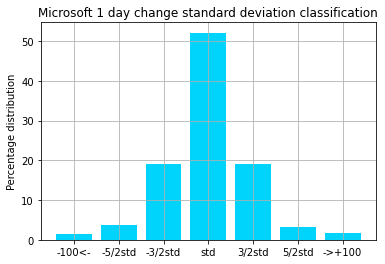

In [18]:
dis_changes = dis['Open'].pct_change(periods = 1).fillna(value = 0).apply(lambda x: x*100).values

c = np.mean(dis_changes)
std = np.std(dis_changes)
n = len(dis_changes)

print(center, sig)
classes = [[-100,c-2.5*std],[c-2.5*std,c-1.5*std],[c-1.5*std,c-0.5*std],
           [c-0.5*std,c+0.5*std],
           [c+0.5*std, c+1.5*std],[c+1.5*std, c+2.5*std],[c+2.5*std, 100]]

his = [0]*7

for val in dis_changes:
    for i in range(4):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break
    
    for i in range(4, 7):
        if classes[i][0] <= val < classes[i][1]:
            his[i]+=1
            break

eloszlas = []
for cl in his:
    eloszlas.append(cl*100/n)
    
plt.grid(visible = True)
plt.title("Microsoft 1 day change standard deviation classification")
plt.ylabel("Percentage distribution")
plt.bar(["-100<-", "-5/2std", "-3/2std", "std","3/2std", "5/2std", "->+100" ],eloszlas, color = "#00d4fd")